# 1. Importación de librerias

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from scipy import stats

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# 2. Importación de data

In [2]:
dat=pd.read_csv('../data/modeling/01_raw.csv',sep='|',encoding='latin-1')
dat.head()

,PERIODO,CODCLAVECIC,EDAD,TIPPER,ANTIGUEDAD,CODACTECONOMICA,DESACTECONOMICA,FLG_ACTECO_NODEF,FLGNP,CTDNP,FLGLSB,CTDLSB,FLGARCHIVONEGATIVO,DESTIPMOTIVONEGATIVO,CTD_NP_LSB,CTDEVAL,CODSUBSEGMENTO,DESSUBSEGMENTO,CODSEGMENTO,DESSEGMENTO,TIPDIR,CODUBIGEO,CODDISTRITO,DESCODDISTRITO,CODPROVINCIA,DESCODPROVINCIA,CODDEPARTAMENTO,DESCODDEPARTAMENTO,CODPAISNACIONALIDAD,DESCODPAISNACIONALIDAD,FLGNACIONALIDAD,MTO_INGRESOS_MES,CTD_INGRESOS_MES,MEDIA_INGRESOS,DESV_INGRESOS,FLG_PERFIL_INGRESOS_3DS,MAX_CTDMTOSREDONDOS,SUM_MTOSREDONDOS,CTDMAXIMA,MTO_MAXIMOSREPETIDOS,MTOMAXDEMAXREPETIDOS,MTO_CONOTROSPROXIMOS,CTD_CONOTROSPROXIMOS
0,202310,14746388,51,P,48,0099,INFORMACION NO DISPONIBLE,1,0,0,0,0,0,NaN,0,0,M1N,CONSUMO NORMAL,PM,CONSUMO,D,.,0000,LOCALIDAD PARA E-MAI,M7,LIMA,30.0,LIMA,PER,PERU,0,1000.0,1,933.33,115.47,0,1,1000.0,1,1000.0,1000.0,1000.0,1
1,202310,4304832,39,P,234,0099,INFORMACION NO DISPONIBLE,1,0,0,0,0,0,NaN,0,0,Q1N,PEQ. EMPRESA NORMAL,PQ,PEQ. EMPRESA,D,150137,1782,SANTA ANITA-LIMA,M7,LIMA,30.0,LIMA,PER,PERU,0,600.0,2,300.00,0.00,0,2,600.0,2,600.0,300.0,600.0,2
2,202310,23699623,39,P,46,9309,OTRAS ACTIVIDS.DE SERVS.,1,0,0,0,0,0,NaN,0,0,NBN,NO BANCO NORMAL,SN,NO BANCO,D,150101,1311,LIMA CERCADO-LIMA,M7,LIMA,30.0,LIMA,PER,PERU,0,600.0,2,300.00,0.00,0,2,600.0,2,600.0,300.0,600.0,2
3,202310,3859377,46,P,242,0091,EMPLEADOS,0,0,0,0,0,0,NaN,0,0,M1N,CONSUMO NORMAL,PM,CONSUMO,D,150605,1244,CHANCAY-LIMA,M4,HUARAL,30.0,LIMA,PER,PERU,0,200.0,1,475.25,459.27,0,1,200.0,1,200.0,200.0,200.0,1
4,202310,18395633,40,P,0,NaN,NaN,1,0,0,0,0,0,NaN,0,0,NBN,NO BANCO NORMAL,SN,NO BANCO,D,.,0000,LOCALIDAD PARA E-MAI,M7,LIMA,30.0,LIMA,PER,PERU,0,150.0,1,0.00,0.00,0,1,150.0,1,150.0,150.0,150.0,1


# 3. Extracción de las personas naturales

In [3]:
nat=dat[dat.TIPPER=='P']
nat.shape

(321850, 43)

# 4. Descripción de la información

In [4]:
# Variables de la información
nat.columns

Index(['PERIODO', 'CODCLAVECIC', 'EDAD', 'TIPPER', 'ANTIGUEDAD',
       'CODACTECONOMICA', 'DESACTECONOMICA', 'FLG_ACTECO_NODEF', 'FLGNP',
       'CTDNP', 'FLGLSB', 'CTDLSB', 'FLGARCHIVONEGATIVO',
       'DESTIPMOTIVONEGATIVO', 'CTD_NP_LSB', 'CTDEVAL', 'CODSUBSEGMENTO',
       'DESSUBSEGMENTO', 'CODSEGMENTO', 'DESSEGMENTO', 'TIPDIR', 'CODUBIGEO',
       'CODDISTRITO', 'DESCODDISTRITO', 'CODPROVINCIA', 'DESCODPROVINCIA',
       'CODDEPARTAMENTO', 'DESCODDEPARTAMENTO', 'CODPAISNACIONALIDAD',
       'DESCODPAISNACIONALIDAD', 'FLGNACIONALIDAD', 'MTO_INGRESOS_MES',
       'CTD_INGRESOS_MES', 'MEDIA_INGRESOS', 'DESV_INGRESOS',
       'FLG_PERFIL_INGRESOS_3DS', 'MAX_CTDMTOSREDONDOS', 'SUM_MTOSREDONDOS',
       'CTDMAXIMA', 'MTO_MAXIMOSREPETIDOS', 'MTOMAXDEMAXREPETIDOS',
       'MTO_CONOTROSPROXIMOS', 'CTD_CONOTROSPROXIMOS'],
      dtype='object')

In [5]:
# Evaluación de duplicados

In [6]:
nat[nat.duplicated(subset=['PERIODO','CODCLAVECIC'])].head()

,PERIODO,CODCLAVECIC,EDAD,TIPPER,ANTIGUEDAD,CODACTECONOMICA,DESACTECONOMICA,FLG_ACTECO_NODEF,FLGNP,CTDNP,FLGLSB,CTDLSB,FLGARCHIVONEGATIVO,DESTIPMOTIVONEGATIVO,CTD_NP_LSB,CTDEVAL,CODSUBSEGMENTO,DESSUBSEGMENTO,CODSEGMENTO,DESSEGMENTO,TIPDIR,CODUBIGEO,CODDISTRITO,DESCODDISTRITO,CODPROVINCIA,DESCODPROVINCIA,CODDEPARTAMENTO,DESCODDEPARTAMENTO,CODPAISNACIONALIDAD,DESCODPAISNACIONALIDAD,FLGNACIONALIDAD,MTO_INGRESOS_MES,CTD_INGRESOS_MES,MEDIA_INGRESOS,DESV_INGRESOS,FLG_PERFIL_INGRESOS_3DS,MAX_CTDMTOSREDONDOS,SUM_MTOSREDONDOS,CTDMAXIMA,MTO_MAXIMOSREPETIDOS,MTOMAXDEMAXREPETIDOS,MTO_CONOTROSPROXIMOS,CTD_CONOTROSPROXIMOS


In [7]:
# Estabilidad Poblacional

In [8]:
nat.PERIODO.value_counts()

202305    48175
202310    47614
202308    46491
202306    46362
202309    46305
202307    43861
202304    43042
Name: PERIODO, dtype: int64

In [9]:
nat.PERIODO.value_counts()/len(nat)

202305    0.149682
202310    0.147938
202308    0.144449
202306    0.144048
202309    0.143871
202307    0.136278
202304    0.133733
Name: PERIODO, dtype: float64

In [10]:
# Valores perdidos

In [11]:
nat.isna().sum()/len(nat)

PERIODO                    0.000000
CODCLAVECIC                0.000000
EDAD                       0.000000
TIPPER                     0.000000
ANTIGUEDAD                 0.000000
CODACTECONOMICA            0.040954
DESACTECONOMICA            0.044822
FLG_ACTECO_NODEF           0.000000
FLGNP                      0.000000
CTDNP                      0.000000
FLGLSB                     0.000000
CTDLSB                     0.000000
FLGARCHIVONEGATIVO         0.000000
DESTIPMOTIVONEGATIVO       0.999842
CTD_NP_LSB                 0.000000
CTDEVAL                    0.000000
CODSUBSEGMENTO             0.000000
DESSUBSEGMENTO             0.000000
CODSEGMENTO                0.000000
DESSEGMENTO                0.000000
TIPDIR                     0.004139
CODUBIGEO                  0.011589
CODDISTRITO                0.004139
DESCODDISTRITO             0.011589
CODPROVINCIA               0.011589
DESCODPROVINCIA            0.011589
CODDEPARTAMENTO            0.011589
DESCODDEPARTAMENTO         0

In [12]:
# Variables utilizadas en los anteriores modelos

In [13]:
x_model=['MTO_CONOTROSPROXIMOS', 'CTD_CONOTROSPROXIMOS','FLG_PERFIL_INGRESOS_3DS']

# 5. EDA

In [14]:
from pandas_profiling import ProfileReport
prof = ProfileReport(nat[x_model])
prof.to_file(output_file='EDA_PPNN.html') # correr sólo para la documentación

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [15]:
# EDA de la varaiable: MTO_CONOTROSPROXIMOS

In [16]:
sns.boxplot(x=nat['MTO_CONOTROSPROXIMOS'])

<AxesSubplot:xlabel='MTO_CONOTROSPROXIMOS'>

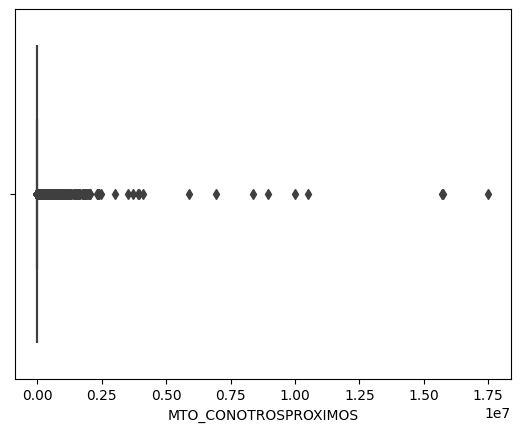

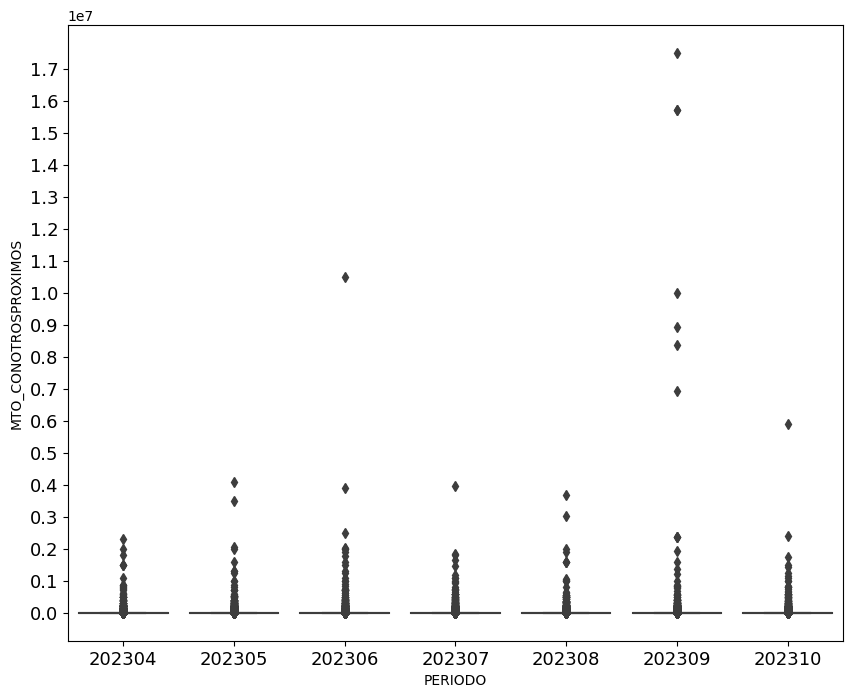

In [17]:
plt.figure(figsize=(10,8))
sns.boxplot(x='PERIODO', y='MTO_CONOTROSPROXIMOS', data=nat)
plt.yticks(range(0,18000000,1000000))

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
#plt.ticklabel_format(axis='y',style='sci',scilimits=(0,0),useMathText=True)

#plt.savefig('mnt_conotrosproximos_ppjj.png')
plt.show()

In [18]:
# EDA de la varaiable: MTO_INGRESOS_MES

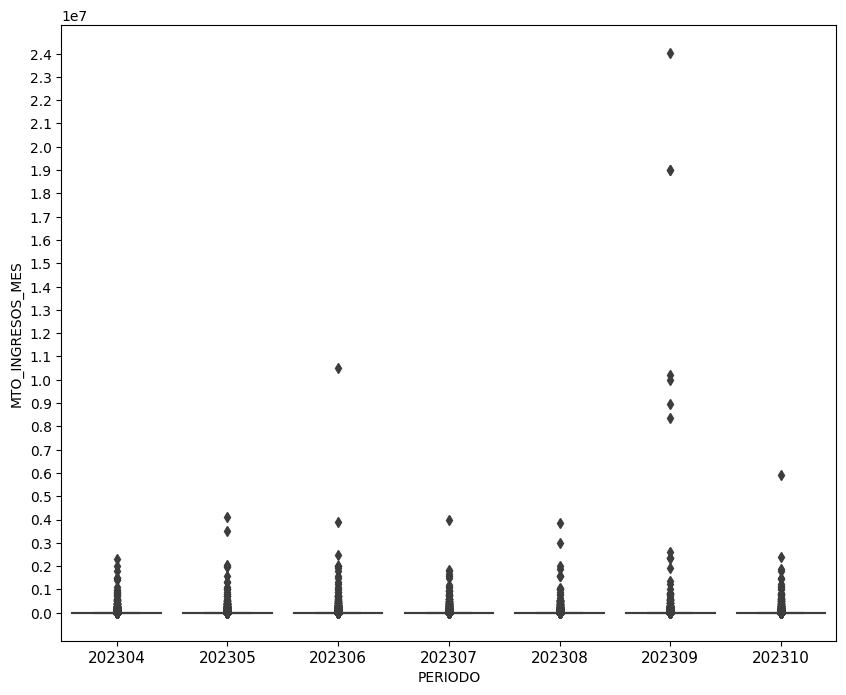

In [19]:
plt.figure(figsize=(10,8))
sns.boxplot(x='PERIODO', y='MTO_INGRESOS_MES', data=nat)
plt.yticks(range(0,25000000,1000000))

plt.xticks(fontsize=11)
plt.yticks(fontsize=10)
#plt.ticklabel_format(axis='y',style='sci',scilimits=(0,0),useMathText=True)

#plt.savefig('mnt_conotrosproximos_ppjj.png')
plt.show()

In [20]:
# EDA de la varaiable: CTD_CONOTROSPROXIMOS

In [21]:
sns.boxplot(x=nat['CTD_CONOTROSPROXIMOS'])# filtrar para kmeasn

<AxesSubplot:xlabel='CTD_CONOTROSPROXIMOS'>

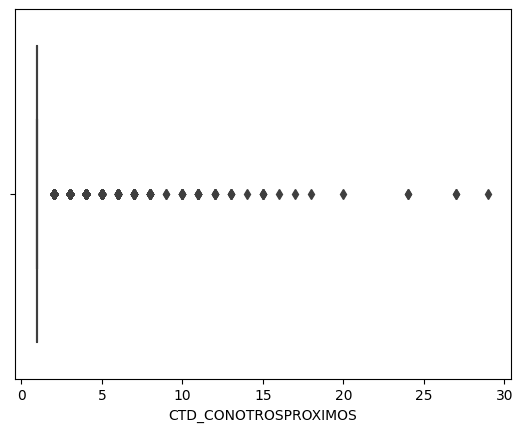

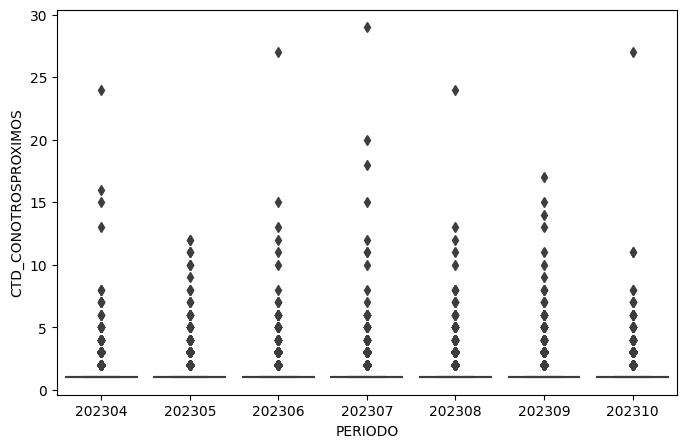

In [22]:
plt.figure(figsize=(8,5))
sns.boxplot(x='PERIODO', y='CTD_CONOTROSPROXIMOS', data=nat)
plt.show()

# 6. Análisis Estadístico

In [23]:
def estadisticos_numericos(df, colum_numericas):
    estadis_num = pd.DataFrame()     
    
    for col in colum_numericas:         
        col_data = df[col]         
        val = [             
            col,             
            col_data.isnull().sum(),             
            col_data.isnull().mean(),             
            col_data.mean(),             
            col_data.min(),    
            col_data.quantile(0.05),         
            col_data.quantile(0.1),
            col_data.quantile(0.2),             
            col_data.quantile(0.25),             
            col_data.quantile(0.5),             
            col_data.quantile(0.75),             
            col_data.quantile(0.8),             
            col_data.quantile(0.85),             
            col_data.quantile(0.9),             
            col_data.quantile(0.95),             
            col_data.quantile(0.99),             
            col_data.max()         
            ]         
        columna = ['Variable', 'Missing', '%Missing', 'Promedio', 'Minimo', 'P5','P10','P20', 'P25', 'P50', 'P75', 'P80', 'P85', 'P90', 'P95', 'P99', 'Maximo']         
        tabla = pd.DataFrame([val], columns=columna)         
        estadis_num = estadis_num.append(tabla, ignore_index=True)     
        
    return estadis_num

In [24]:
estadisticos_numericos(nat,x_model)

,Variable,Missing,%Missing,Promedio,Minimo,P5,P10,P20,P25,P50,P75,P80,P85,P90,P95,P99,Maximo
0,MTO_CONOTROSPROXIMOS,0,0.0,3480.428381,100.01,130.0,150.0,200.0,200.0,497.0,1350.0,1900.0,2475.0,4000.0,8311.7965,40000.0,17504812.28
1,CTD_CONOTROSPROXIMOS,0,0.0,1.072338,1.00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0000,2.0,29.00
2,FLG_PERFIL_INGRESOS_3DS,0,0.0,0.048908,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,1.0,1.00


# 7. Correlación de variables

interval columns not set, guessing: ['MTO_CONOTROSPROXIMOS', 'CTD_CONOTROSPROXIMOS', 'FLG_PERFIL_INGRESOS_3DS']


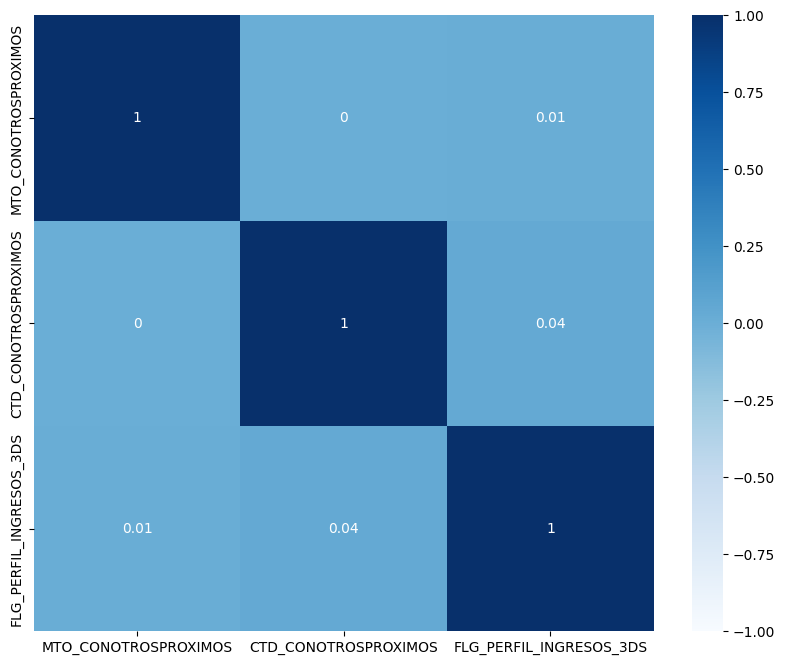

In [25]:
plt.figure(figsize=[10,8])
import phik
corr=round(nat[x_model].phik_matrix(),2)
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap="Blues",
        vmin=-1, vmax=1,
        annot=True)
plt.show()

# 8. Número de outliers

In [26]:
def outlier(data,var_num):
    dfcorr=data[var_num]
    mean = dfcorr.mean()
    std = dfcorr.std()
    out=(dfcorr > (mean+3*std)).sum()
    out_df=pd.DataFrame(out)
    out_df.columns=["N° Outliers"]
    return(out_df)

In [27]:
outlier(nat,x_model)

,N° Outliers
MTO_CONOTROSPROXIMOS,497
CTD_CONOTROSPROXIMOS,2371
FLG_PERFIL_INGRESOS_3DS,15741


# 9. Estabilidad de varaibles

In [28]:
# PSI

In [29]:
train_nat=nat[nat.PERIODO!=202310]
test_nat=nat[nat.PERIODO==202310]

In [30]:
# MTO_CONOTROSPROXIMOS

In [31]:
train_nat['MTO_CONOTROSPROXIMOS_transf']=pd.qcut(train_nat['MTO_CONOTROSPROXIMOS'],3,duplicates='drop',labels=['monto_q1','monto_q2','monto_q3'])
train_nat['MTO_CONOTROSPROXIMOS_transf'].value_counts(True)

monto_q1    0.334941
monto_q3    0.333333
monto_q2    0.331725
Name: MTO_CONOTROSPROXIMOS_transf, dtype: float64

In [32]:
bins_MTO_CONOTROSPROXIMOS=pd.qcut(train_nat['MTO_CONOTROSPROXIMOS'],3,duplicates='drop',retbins=True,labels=False)

bins_MTO_CONOTROSPROXIMOS=[float('-Inf'),  3.0000e+02, 1.0000e+03,float('Inf')]
test_nat['MTO_CONOTROSPROXIMOS_transf']=pd.cut(test_nat['MTO_CONOTROSPROXIMOS'],bins=bins_MTO_CONOTROSPROXIMOS,labels=['monto_q1','monto_q2','monto_q3'])

In [33]:
test_nat['MTO_CONOTROSPROXIMOS_transf'].value_counts(True)

monto_q1    0.382304
monto_q2    0.315411
monto_q3    0.302285
Name: MTO_CONOTROSPROXIMOS_transf, dtype: float64

In [34]:
porc_train=pd.DataFrame(train_nat['MTO_CONOTROSPROXIMOS_transf'].value_counts(True)).reset_index()
porc_train.columns=['MTO_CONOTROSPROXIMOS_transf','initial_percent']

porc_test=pd.DataFrame(test_nat['MTO_CONOTROSPROXIMOS_transf'].value_counts(True)).reset_index()
porc_test.columns=['MTO_CONOTROSPROXIMOS_transf','new_percent']

tabla_psi=porc_train.merge(porc_test,how='left',on='MTO_CONOTROSPROXIMOS_transf')
tabla_psi['PSI']=(tabla_psi['initial_percent']-tabla_psi['new_percent'])*np.log(tabla_psi['initial_percent']/tabla_psi['new_percent'])
tabla_psi.PSI.sum()

0.010122430558293097

In [35]:
# CTD_CONOTROSPROXIMOS

In [36]:
train_nat['CTD_CONOTROSPROXIMOS_transf']=np.select(
    [
        (train_nat['CTD_CONOTROSPROXIMOS']==1)
    ],
    [1],
    default=0
)

test_nat['CTD_CONOTROSPROXIMOS_transf']=np.select(
    [
        (test_nat['CTD_CONOTROSPROXIMOS']==1)
    ],
    [1],
    default=0
)
print(train_nat.CTD_CONOTROSPROXIMOS_transf.value_counts(True),test_nat.CTD_CONOTROSPROXIMOS_transf.value_counts(True))

1    0.940449
0    0.059551
Name: CTD_CONOTROSPROXIMOS_transf, dtype: float64 1    0.934011
0    0.065989
Name: CTD_CONOTROSPROXIMOS_transf, dtype: float64


In [37]:
porc_train=pd.DataFrame(train_nat['CTD_CONOTROSPROXIMOS_transf'].value_counts(True)).reset_index()
porc_train.columns=['CTD_CONOTROSPROXIMOS_transf','initial_percent']

porc_test=pd.DataFrame(test_nat['CTD_CONOTROSPROXIMOS_transf'].value_counts(True)).reset_index()
porc_test.columns=['CTD_CONOTROSPROXIMOS_transf','new_percent']

tabla_psi=porc_train.merge(porc_test,how='left',on='CTD_CONOTROSPROXIMOS_transf')
tabla_psi['PSI']=(tabla_psi['initial_percent']-tabla_psi['new_percent'])*np.log(tabla_psi['initial_percent']/tabla_psi['new_percent'])
tabla_psi.PSI.sum()

0.0007051385052078239

In [38]:
# FLG_PERFIL_INGRESOS_3DS

In [39]:
porc_train=pd.DataFrame(train_nat['FLG_PERFIL_INGRESOS_3DS'].value_counts(True)).reset_index()
porc_train.columns=['FLG_PERFIL_INGRESOS_3DS','initial_percent']

porc_test=pd.DataFrame(train_nat['FLG_PERFIL_INGRESOS_3DS'].value_counts(True)).reset_index()
porc_test.columns=['FLG_PERFIL_INGRESOS_3DS','new_percent']

tabla_psi=porc_train.merge(porc_test,how='left',on='FLG_PERFIL_INGRESOS_3DS')
tabla_psi['PSI']=(tabla_psi['initial_percent']-tabla_psi['new_percent'])*np.log(tabla_psi['initial_percent']/tabla_psi['new_percent'])
tabla_psi.PSI.sum()

0.0